In [23]:
print("hello")

hello


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import matplotlib.axes as ax
# from matplotlib.animation import FuncAnimation
import seaborn as sns


In [25]:
url = 'https://raw.githubusercontent.com/AshishJangra27/Machine-Learning-with-Python-GFG/main/Linear%20Regression/data_for_lr.csv'
data = pd.read_csv(url)
data
data.shape

(700, 2)

In [26]:
# url = 'https://raw.githubusercontent.com/AshishJangra27/Machine-Learning-with-Python-GFG/main/Linear%20Regression/data_for_lr.csv'
data = pd.read_csv('/content/drive/MyDrive/TE/Temp/Dsdba/HousingData.csv')
# data

# data = data.dropna()
data
# # training dataset and labels
# train_input = np.array(data.RM[0:489]).reshape(489, 1)
# print(train_input)
# train_output = np.array(data.y[0:500]).reshape(500, 1)

# # valid dataset and labels
# test_input = np.array(data.x[500:700]).reshape(199, 1)
# test_output = np.array(data.y[500:700]).reshape(199, 1)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [27]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [28]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<ipython-input-29-f8e1002faed6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['RM'])


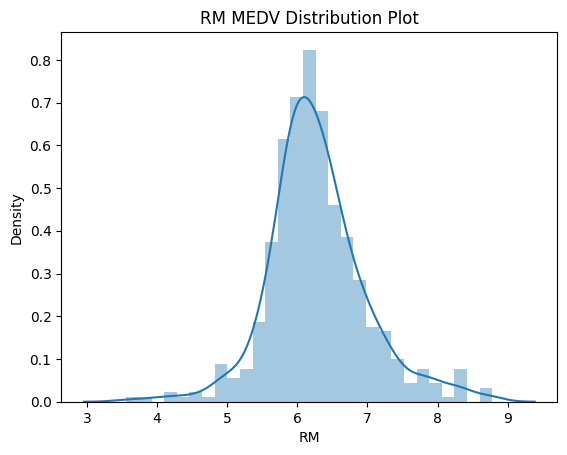

In [29]:
plt.title('RM MEDV Distribution Plot')
sns.distplot(data['RM'])
plt.show()

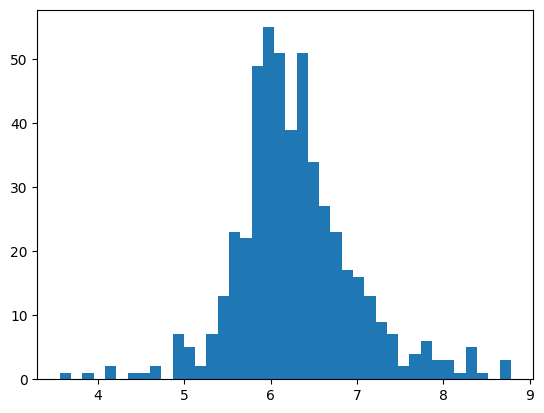

In [30]:
plt.hist(data['RM'],bins=40);

<Axes: title={'center': 'RM MEDV Distribution Plot'}, xlabel='MEDV', ylabel='Count'>

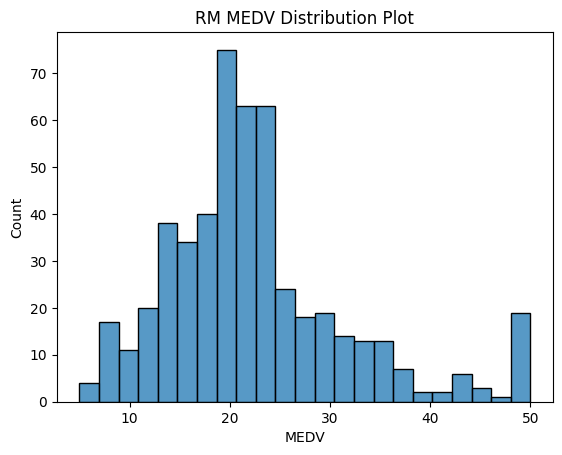

In [31]:
plt.title('RM MEDV Distribution Plot')
sns.histplot(data['MEDV'])
# plt.show()

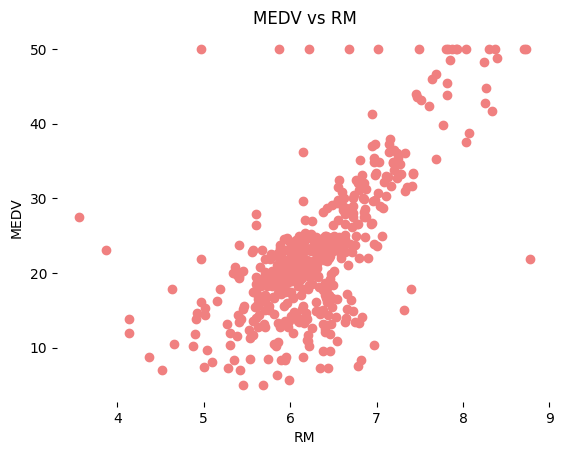

In [32]:
# Relationship between Salary and Experience
plt.scatter(data['RM'], data['MEDV'], color = 'lightcoral')
plt.title('MEDV vs RM')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.box(False)
plt.show()

In [33]:
x = data['RM']
y = data['MEDV']
print(x)
print(y)
# y = mx+c

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 506, dtype: float64
0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64


In [34]:
data.shape

(506, 14)

In [35]:
x_mean = np.mean(x)
print(x_mean)

y_mean = np.mean(y)
print(y_mean)

n = 0;
for i in range(0,506):
  xi = x[i]
  yi = y[i]
  n += (xi-x_mean)*(yi-y_mean)

d = 0;
for xi in x:
  d += np.square(xi-x_mean)

print(n)
print(d)

b1 = n/d
print(b1)

b0 = y_mean - (b1*x_mean)
print(b0)
print(f"y = {b0}+{b1}x")

# Coefficient: [[9.37638431]]
# Intercept: [-36.47618963]


6.284634387351779
22.532806324110677
2269.1901691699604
249.30377936166028
9.102108981180303
-34.67062077643851
y = -34.67062077643851+9.102108981180303x


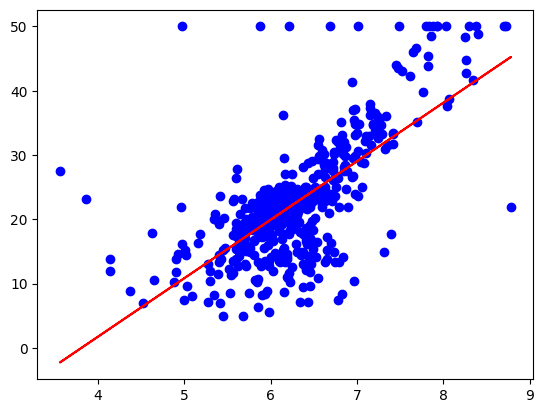

In [36]:
plt.scatter(x,y,color='blue');
plt.plot(x,b0+(b1*x),color='red');

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pandas as pd

In [38]:

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
# print(X_train)
X_train = X_train.values.reshape(-1, 1)
# print(X_train)

y_train = y_train.values.reshape(-1, 1)
# print(y_train)

In [39]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [40]:
X_test = X_test.values.reshape(-1, 1)
# y_pred_test = regressor.predict(X_test)     # predicted value of y_test
y_pred_train = regressor.predict(X_train)   # predicted value of y_train

y_pred_test = regressor.predict(X_test)
score = r2_score(y_test, y_pred_test)
print(score)

0.42394386816456286


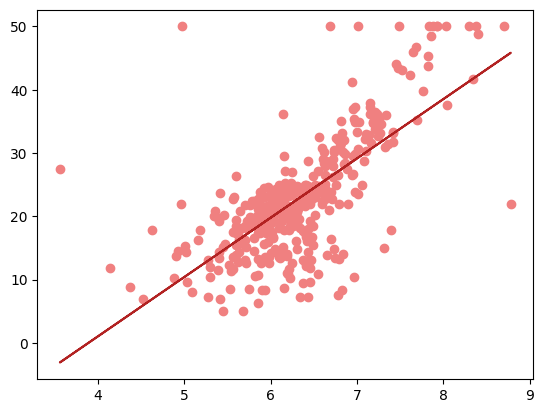

In [41]:
plt.scatter(X_train, y_train, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'firebrick')

# plt.title('Salary vs Experience (Training Set)')
# plt.xlabel('Years of Experience')
# plt.ylabel('Salary')
# plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'Sal/Exp', loc='best', facecolor='white')
# plt.box(False)
# plt.show()

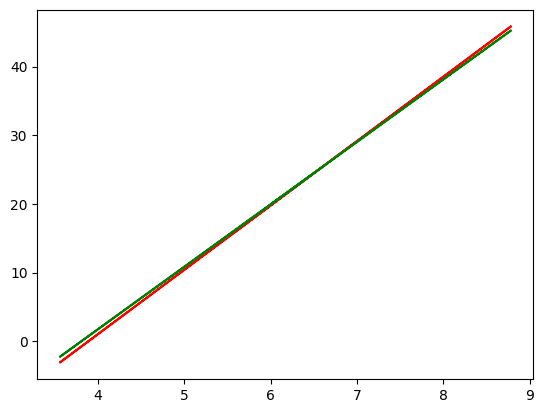

In [42]:
# plt.scatter(X_train, y_train, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'red')
# plt.scatter(x,y,color='blue');
plt.plot(x,b0+(b1*x),color='green');


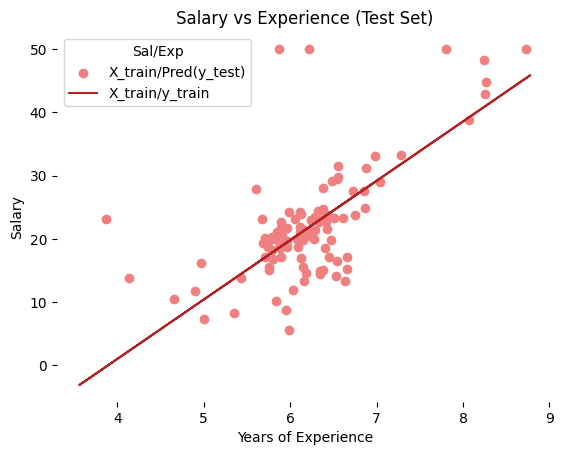

In [43]:
# Prediction on test set
plt.scatter(X_test, y_test, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('Salary vs Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'Sal/Exp', loc='best', facecolor='white')
plt.box(False)
plt.show()

In [44]:
# Regressor coefficients and intercept
print(f'Coefficient: {regressor.coef_}')
print(f'Intercept: {regressor.intercept_}')

Coefficient: [[9.37638431]]
Intercept: [-36.47618963]
